In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
image_path = "/home/vidit/Desktop/DAT-103/ProjectData/Clipped_try1.tif"
with rasterio.open(image_path) as src:
    bands = [src.read(i) for i in range(1, src.count + 1)]


In [3]:
flattened_bands = [band.flatten() for band in bands]
band_names = ["Blue", "Green", "Red", "NIR"]

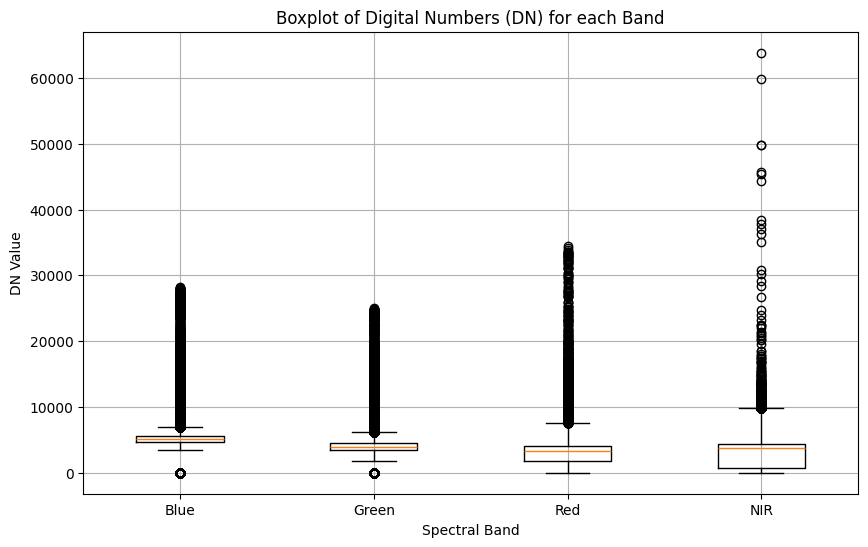

In [4]:
plt.figure(figsize=(10, 6))
plt.boxplot(flattened_bands, tick_labels= band_names)
plt.title("Boxplot of Digital Numbers (DN) for each Band")
plt.xlabel("Spectral Band")
plt.ylabel("DN Value")
plt.grid(True)
plt.show()


## DN --> Reflectance

In [5]:
# Load DN image
with rasterio.open(image_path) as src:
    profile = src.profile  # Save original metadata for later saving
    dn_bands = [src.read(i) for i in range(1, src.count + 1)]


In [11]:
# Apply reflectance conversion
scale_factor = 0.00001
reflectance_bands = [band.astype(np.float32) * scale_factor for band in dn_bands]

In [12]:
pwd

'/home/vidit/Desktop/DAT-103/notebooks/jupyter-notebooks/Data-API'

In [13]:
reflectance_path = "/home/vidit/Desktop/DAT-103/ProjectData/planetscope_reflectance.tif"

with rasterio.open(
    reflectance_path,
    'w',
    driver='GTiff',
    height=reflectance_bands[0].shape[0],
    width=reflectance_bands[0].shape[1],
    count=len(reflectance_bands),
    dtype='float32',
    crs=profile['crs'],
    transform=profile['transform']
) as dst:
    for i, band in enumerate(reflectance_bands, start=1):
        dst.write(band, i)


In [14]:
flattened_reflectance = [band.flatten() for band in reflectance_bands]
band_names = ["Blue", "Green", "Red", "NIR"]

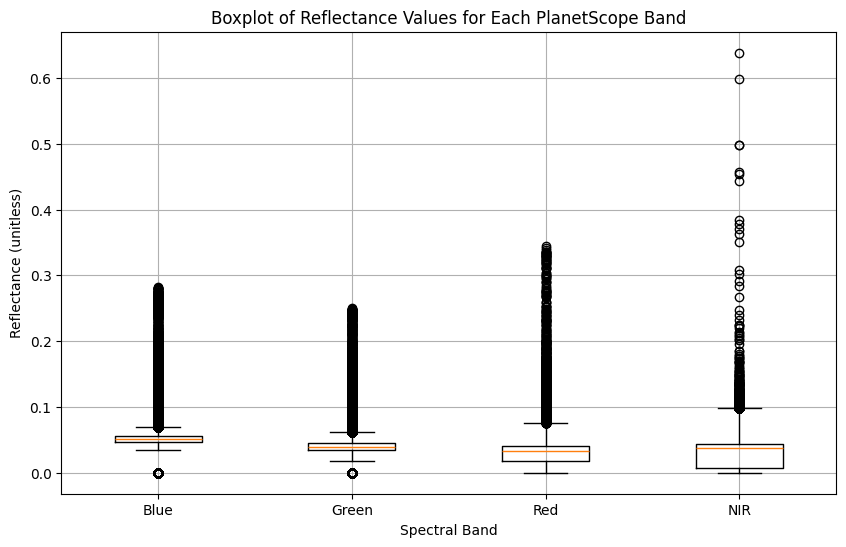

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(flattened_reflectance, tick_labels=band_names)
plt.title("Boxplot of Reflectance Values for Each PlanetScope Band")
plt.xlabel("Spectral Band")
plt.ylabel("Reflectance (unitless)")
plt.grid(True)
plt.show()